Лабораторная работа №1
"Предобработка данных"
Выполнил: Мартынов В.А., ДПИ-15

Загрузка данных

In [49]:
# 1.1 Исходные данные в виде файла "heart_failure_clinical_records_dataset.csv"

In [50]:
# 1.2 Создал Python скрипт. Загрузил датасет в датафрейм, и исключил бинарные признаки и признак времени.

import pandas as pd
import numpy as np

df = pd.read_csv('c:/Users/v-mar/Desktop/heart_failure_clinical_records_dataset.csv')

df = df.drop(columns = ['anaemia','diabetes','high_blood_pressure','sex','smoking','time','DEATH_EVENT'])

print(df) #Вывод датафрейма с данными для лаб. работы. Должно быть 299 наблюдений и 6 признаков

      age  creatinine_phosphokinase  ejection_fraction  platelets  \
0    75.0                       582                 20  265000.00   
1    55.0                      7861                 38  263358.03   
2    65.0                       146                 20  162000.00   
3    50.0                       111                 20  210000.00   
4    65.0                       160                 20  327000.00   
..    ...                       ...                ...        ...   
294  62.0                        61                 38  155000.00   
295  55.0                      1820                 38  270000.00   
296  45.0                      2060                 60  742000.00   
297  45.0                      2413                 38  140000.00   
298  50.0                       196                 45  395000.00   

     serum_creatinine  serum_sodium  
0                 1.9           130  
1                 1.1           136  
2                 1.3           129  
3                 1

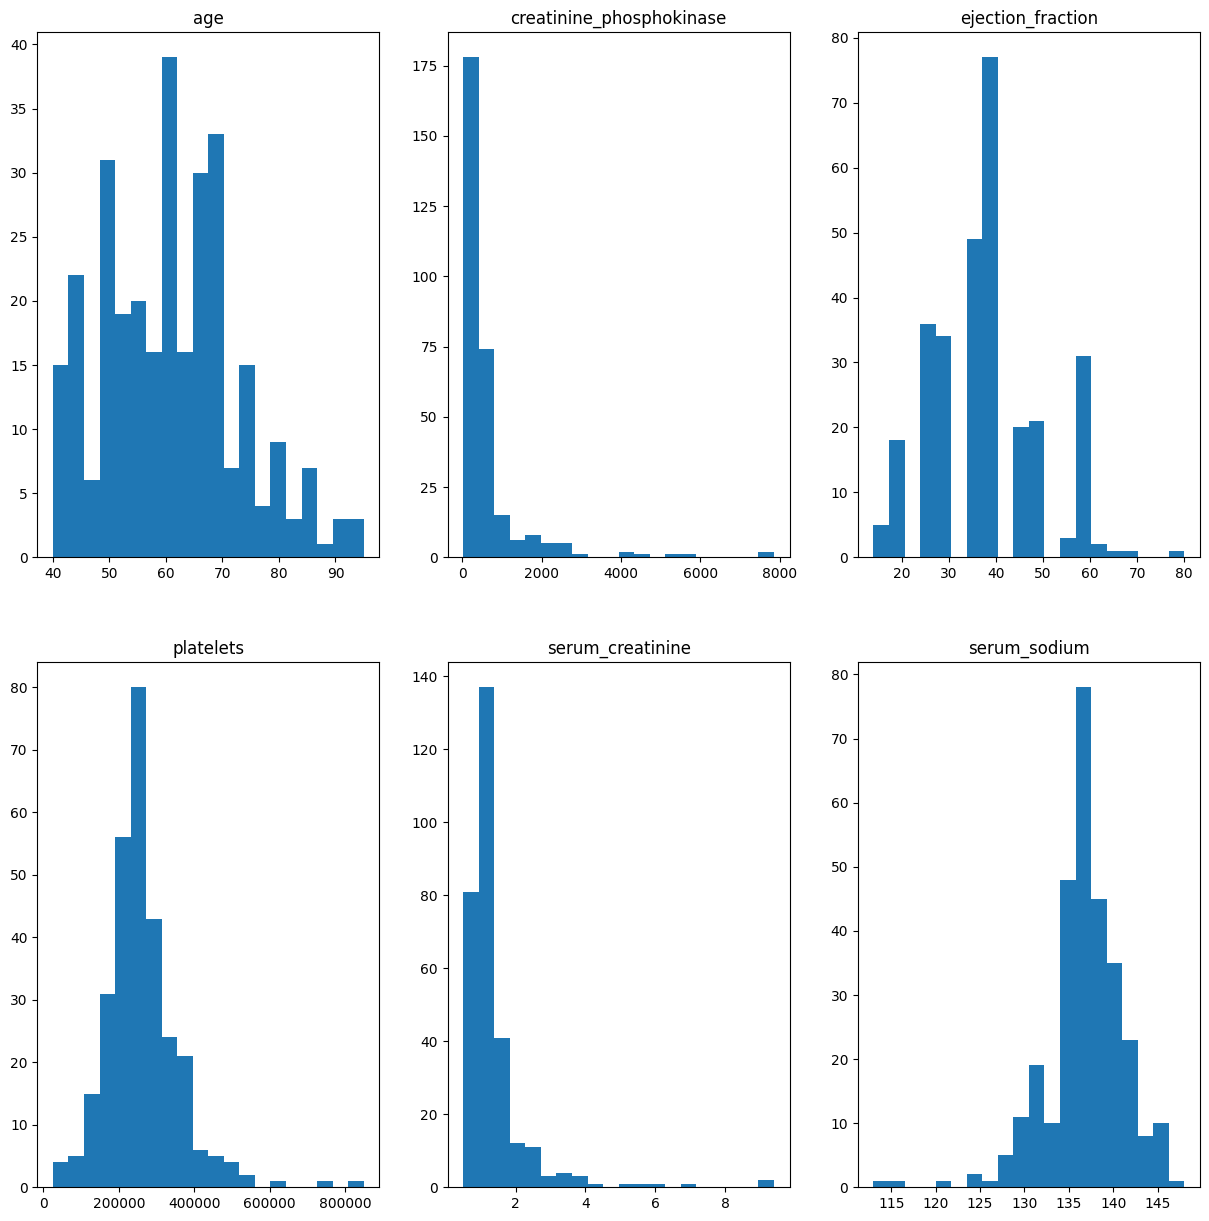

In [51]:
# 1.3 Построил гистограммы признаков

import matplotlib.pyplot as plt

n_bins = 20

fig, axs = plt.subplots(2,3)

fig.set_figheight(15)
fig.set_figwidth(15)

axs[0, 0].hist(df['age'].values, bins = n_bins)
axs[0, 0].set_title('age')
axs[0, 1].hist(df['creatinine_phosphokinase'].values, bins = n_bins)
axs[0, 1].set_title('creatinine_phosphokinase')
axs[0, 2].hist(df['ejection_fraction'].values, bins = n_bins)
axs[0, 2].set_title('ejection_fraction')
axs[1, 0].hist(df['platelets'].values, bins = n_bins)
axs[1, 0].set_title('platelets')
axs[1, 1].hist(df['serum_creatinine'].values, bins = n_bins)
axs[1, 1].set_title('serum_creatinine')
axs[1, 2].hist(df['serum_sodium'].values, bins = n_bins)
axs[1, 2].set_title('serum_sodium')
plt.show()

In [52]:
# 1.4.1 Диапазоны значений для каждого из признаков
df.agg(['min','max'])

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium
min,40.0,23,14,25100.0,0.5,113
max,95.0,7861,80,850000.0,9.4,148


In [53]:
# 1.4.2 Значение, рядом с которым лежит наибольшее количество наблюдений
df.mode()

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium
0,60.0,582,35,263358.03,1.0,136


In [54]:
# 1.5 Так как библиотека Sklearn работает с NumPy массива, то преобразовал датафрейм к двумерному массиву NumPy, где строка соответствует наблюдению, а столбец признаку

data = df.to_numpy(dtype='float')

Стандартизация данных

In [55]:
# 2.1 Подключил модуль Sklearn. Настроил стандартизацию на основе первых 150 наблюдений используя StandardScaler

from sklearn import preprocessing

scaler = preprocessing.StandardScaler().fit(data[:150,:])


In [56]:
# 2.2 Стандартизировал все данные
data_scaled = scaler.transform(data)

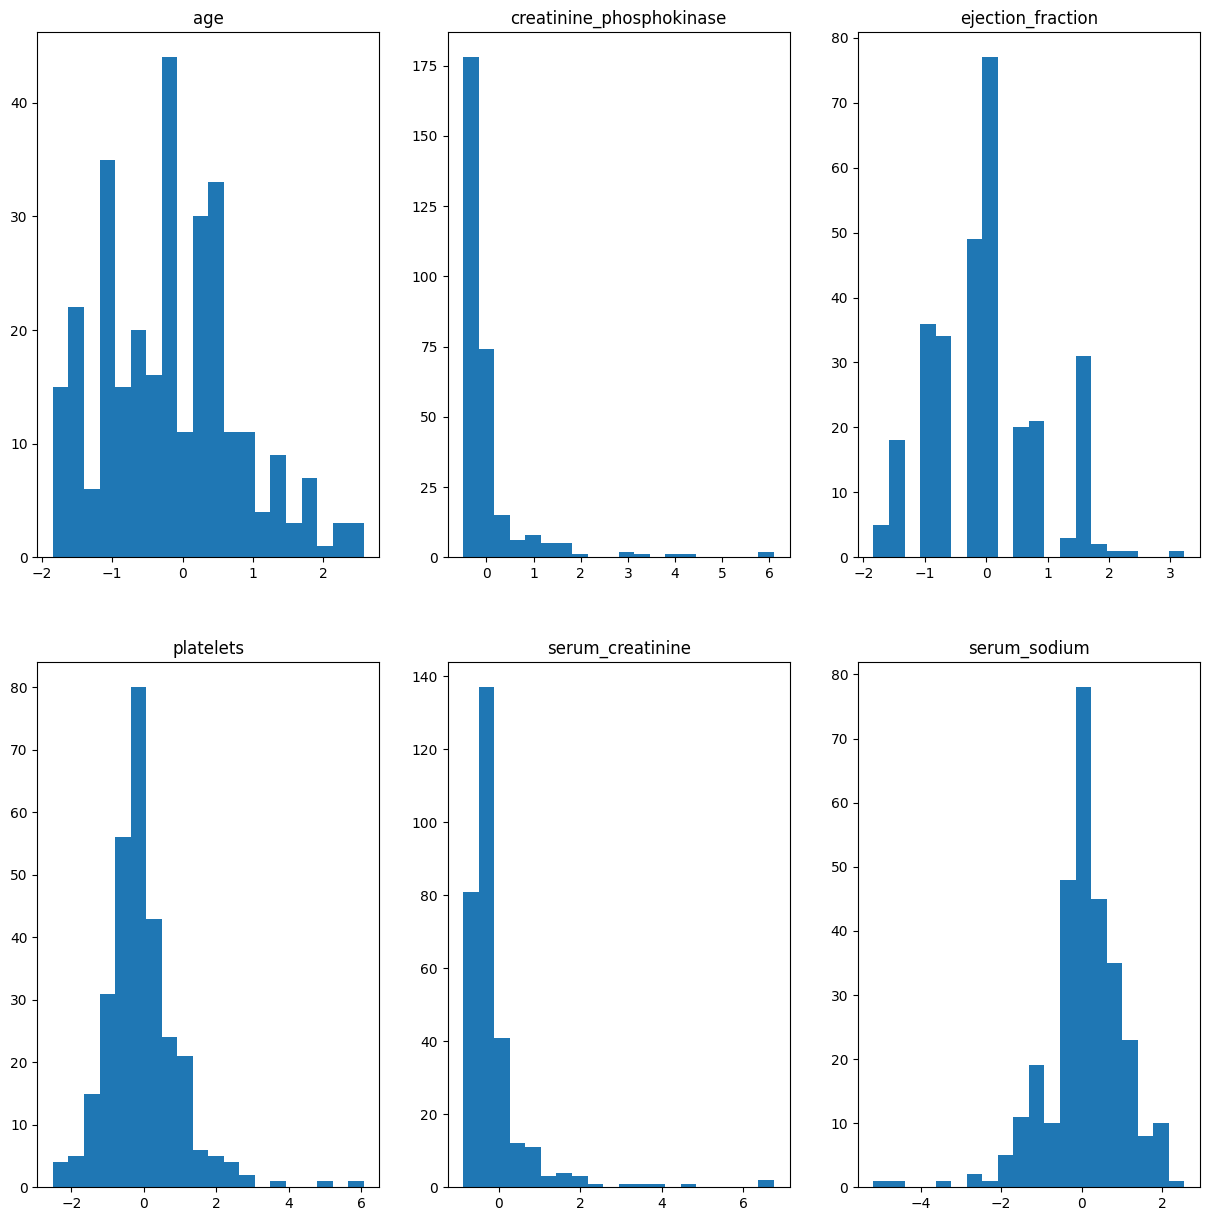

In [57]:
# 2.3  Построил гистограммы стандартизированных данных

fig, axs = plt.subplots(2,3)

fig.set_figheight(15)
fig.set_figwidth(15)

axs[0, 0].hist(data_scaled[:,0], bins = n_bins)
axs[0, 0].set_title('age')
axs[0, 1].hist(data_scaled[:,1], bins = n_bins)
axs[0, 1].set_title('creatinine_phosphokinase')
axs[0, 2].hist(data_scaled[:,2], bins = n_bins)
axs[0, 2].set_title('ejection_fraction')
axs[1, 0].hist(data_scaled[:,3], bins = n_bins)
axs[1, 0].set_title('platelets')
axs[1, 1].hist(data_scaled[:,4], bins = n_bins)
axs[1, 1].set_title('serum_creatinine')
axs[1, 2].hist(data_scaled[:,5], bins = n_bins)
axs[1, 2].set_title('serum_sodium')
plt.show()


In [58]:
# 2.4.1 Преобразование стандартизированных данных обратно в датафрейм и вывод сводки для сравнения

data_desc = pd.DataFrame(data_scaled, columns=['age','creatinine_phosphokinase','ejection_fraction','platelets','serum_creatinine','serum_sodium'])

data_desc.describe()

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000
mean,-0.169704,-0.021277,0.010502,-0.035229,-0.108641,0.037908
std,0.955423,0.815544,0.907627,1.016763,0.886913,0.972000
min,-1.843138,-0.490991,-1.836497,-2.512135,-0.874988,-5.166406
25%,-0.959588,-0.412403,-0.609439,-0.563944,-0.532057,-0.540431
50%,-0.236684,-0.300194,0.004090,-0.049347,-0.360592,0.120422
75%,0.566543,-0.021142,0.540928,0.382083,-0.103394,0.781276
max,2.574609,6.096985,3.225117,6.063441,6.755221,2.543552


In [59]:
# 2.4.2 Вывод сводки по первоначальному датафрейму

df.describe()


,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium
count,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000
mean,60.833893,581.839465,38.083612,263358.029264,1.39388,136.625418
std,11.894809,970.287881,11.834841,97804.236869,1.03451,4.412477
min,40.000000,23.000000,14.000000,25100.000000,0.50000,113.000000
25%,51.000000,116.500000,30.000000,212500.000000,0.90000,134.000000
50%,60.000000,250.000000,38.000000,262000.000000,1.10000,137.000000
75%,70.000000,582.000000,45.000000,303500.000000,1.40000,140.000000
max,95.000000,7861.000000,80.000000,850000.000000,9.40000,148.000000


In [60]:
# 2.5 Рассчитал мат. ожидание и СКО до и после стандартизации. На основании этих значений вывел для каждого признака формулы по которым они стандартизировались.

math_expected_value = np.mean(data, axis=0)
print('Мат. ожидание до:', math_expected_value)

standart_deviation = np.std(data, axis=0)
print('СКО до:', standart_deviation)

math_expected_value_after = np.mean(data_scaled, axis=0)
print('Мат. ожидание после:', math_expected_value_after)

standart_deviation_after = np.std(data_scaled, axis=0)
print('СКО до:', standart_deviation_after)

Мат. ожидание до: [6.08338930e+01 5.81839465e+02 3.80836120e+01 2.63358029e+05
 1.39387960e+00 1.36625418e+02]
СКО до: [1.18749014e+01 9.68663967e+02 1.18150335e+01 9.76405477e+04
 1.03277867e+00 4.40509238e+00]
Мат. ожидание после: [-0.16970362 -0.02127675  0.01050249 -0.03522879 -0.1086408   0.0379076 ]
СКО до: [0.95382379 0.81417905 0.90610822 1.01506113 0.88542887 0.9703736 ]


In [61]:
# 2.6 Сравнил значения из формул с полями mean_ и var_ объекта scaler

print('scaler.mean_', scaler.mean_, '\n')
print('scaler.var_=', scaler.var_)

scaler.mean_ [6.29466667e+01 6.07153333e+02 3.79466667e+01 2.66746749e+05
 1.52060000e+00 1.36453333e+02] 

scaler.var_= [1.54997156e+02 1.41548882e+06 1.70023822e+02 9.25286050e+09
 1.36052697e+00 2.06078222e+01]


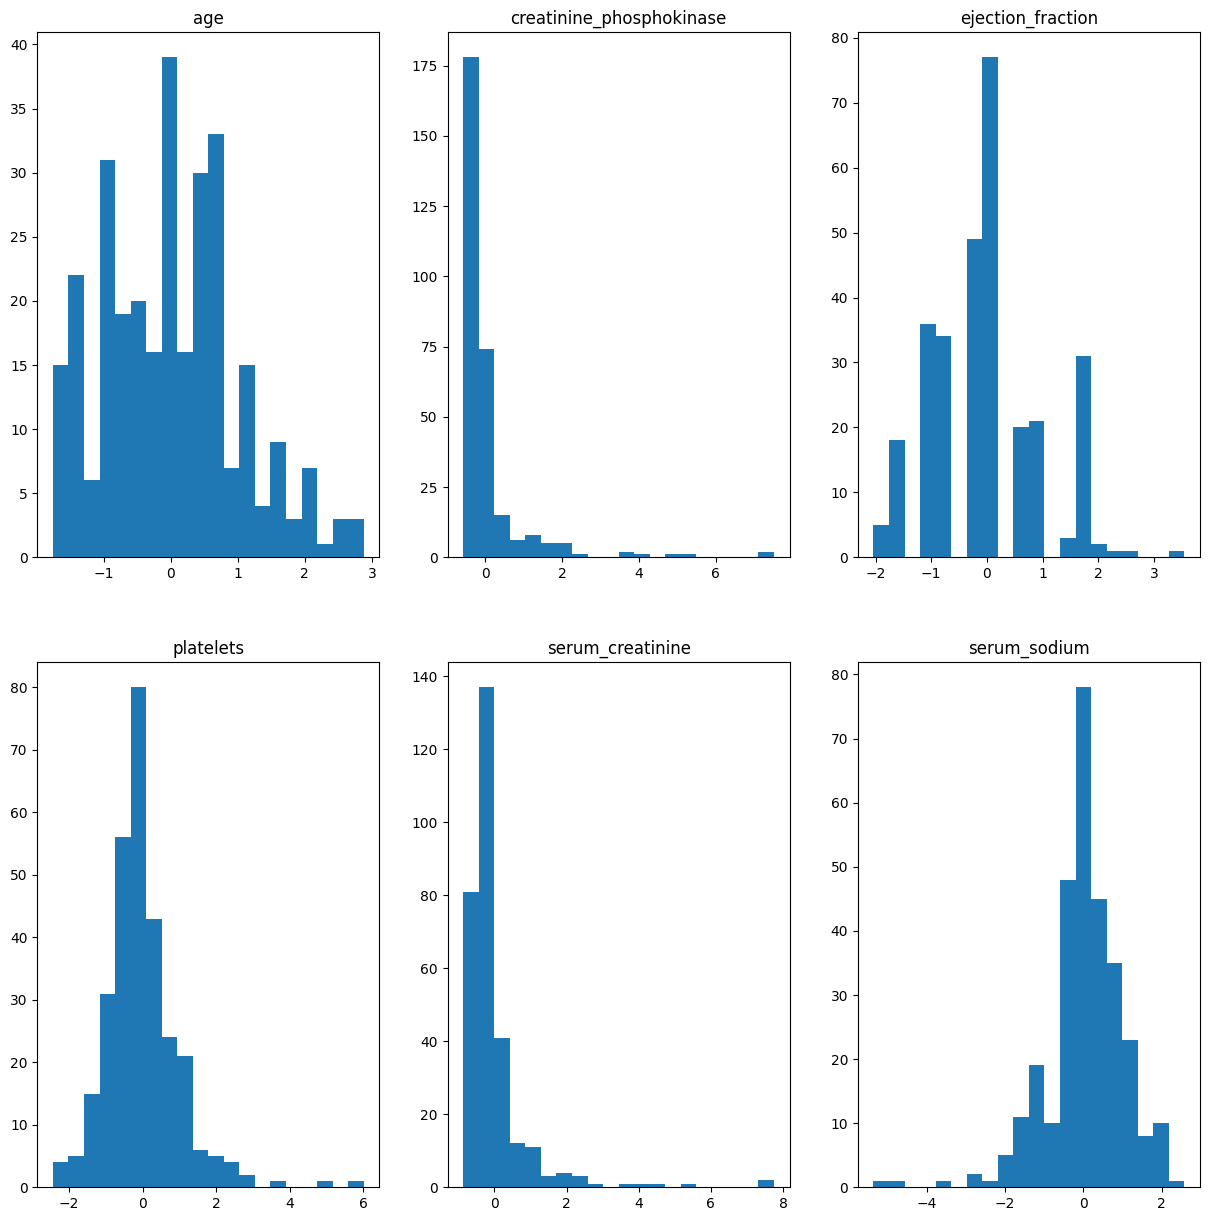

In [62]:
# 2.7.1  Провёл настройку стандартизации на всех данных и сравнил с результатами настройки на основании 150 наблюдений

data_scaled_all = preprocessing.StandardScaler().fit_transform(data[:,:])

fig, axs = plt.subplots(2,3)

fig.set_figheight(15)
fig.set_figwidth(15)

axs[0, 0].hist(data_scaled_all[:,0], bins = n_bins)
axs[0, 0].set_title('age')
axs[0, 1].hist(data_scaled_all[:,1], bins = n_bins)
axs[0, 1].set_title('creatinine_phosphokinase')
axs[0, 2].hist(data_scaled_all[:,2], bins = n_bins)
axs[0, 2].set_title('ejection_fraction')
axs[1, 0].hist(data_scaled_all[:,3], bins = n_bins)
axs[1, 0].set_title('platelets')
axs[1, 1].hist(data_scaled_all[:,4], bins = n_bins)
axs[1, 1].set_title('serum_creatinine')
axs[1, 2].hist(data_scaled_all[:,5], bins = n_bins)
axs[1, 2].set_title('serum_sodium')
plt.show()

In [63]:
# 2.7.2

data_desc_all = pd.DataFrame(data_scaled_all, columns=['age','creatinine_phosphokinase','ejection_fraction','platelets','serum_creatinine','serum_sodium'])

data_desc_all.describe()

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium
count,2.990000e+02,299.000000,2.990000e+02,2.990000e+02,2.990000e+02,2.990000e+02
mean,5.703353e-16,0.000000,-3.267546e-17,7.723291e-17,1.425838e-16,-8.673849e-16
std,1.001676e+00,1.001676,1.001676e+00,1.001676e+00,1.001676e+00,1.001676e+00
min,-1.754448e+00,-0.576918,-2.038387e+00,-2.440155e+00,-8.655094e-01,-5.363206e+00
25%,-8.281242e-01,-0.480393,-6.841802e-01,-5.208700e-01,-4.782047e-01,-5.959961e-01
50%,-7.022315e-02,-0.342574,-7.076750e-03,-1.390846e-02,-2.845524e-01,8.503384e-02
75%,7.718891e-01,0.000166,5.853888e-01,4.111199e-01,5.926150e-03,7.660638e-01
max,2.877170e+00,7.514640,3.547716e+00,6.008180e+00,7.752020e+00,2.582144e+00


In [64]:
# 2.7.3 

data_desc.describe()

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000
mean,-0.169704,-0.021277,0.010502,-0.035229,-0.108641,0.037908
std,0.955423,0.815544,0.907627,1.016763,0.886913,0.972000
min,-1.843138,-0.490991,-1.836497,-2.512135,-0.874988,-5.166406
25%,-0.959588,-0.412403,-0.609439,-0.563944,-0.532057,-0.540431
50%,-0.236684,-0.300194,0.004090,-0.049347,-0.360592,0.120422
75%,0.566543,-0.021142,0.540928,0.382083,-0.103394,0.781276
max,2.574609,6.096985,3.225117,6.063441,6.755221,2.543552


Приведение к диапазону

In [65]:
# 3.1 Привёл данные к диапазону используя MinMaxScaler

min_max_scaler = preprocessing.MinMaxScaler().fit(data)
data_min_max_scaled = min_max_scaler.transform(data)

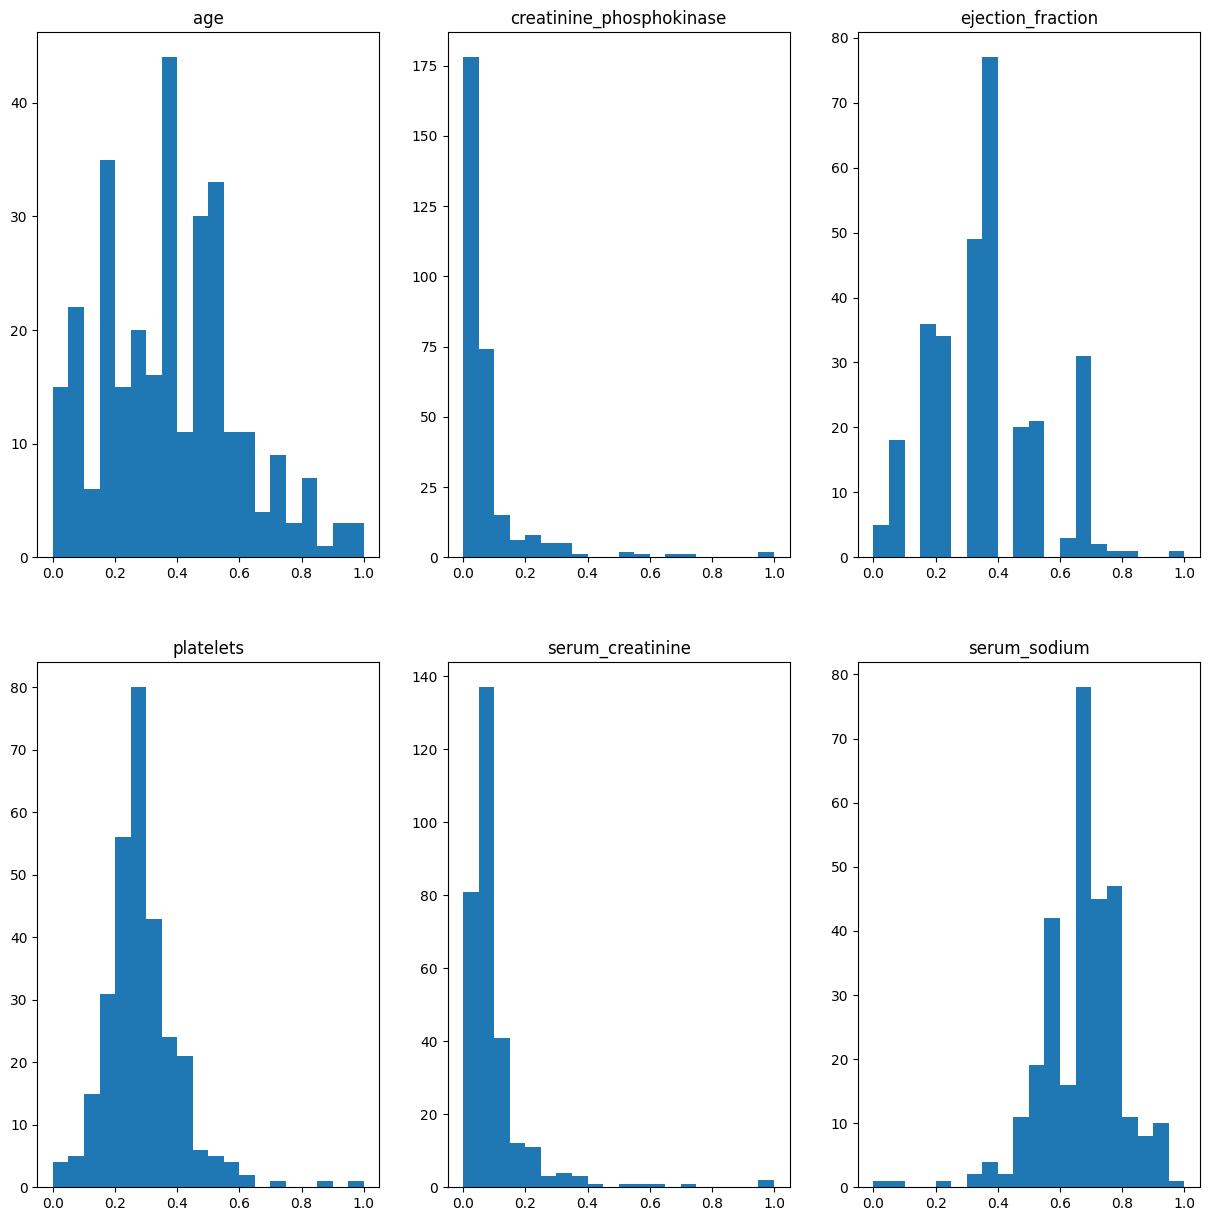

In [66]:
# 3.2 Построил гистограммы для признаков и сравнил с исходными данными

fig, axs = plt.subplots(2,3)

fig.set_figheight(15)
fig.set_figwidth(15)

axs[0,0].hist(data_min_max_scaled[:,0], bins = n_bins)
axs[0,0].set_title('age')

axs[0,1].hist(data_min_max_scaled[:,1], bins = n_bins)
axs[0,1].set_title('creatinine_phosphokinase')

axs[0,2].hist(data_min_max_scaled[:,2], bins = n_bins)
axs[0,2].set_title('ejection_fraction')

axs[1,0].hist(data_min_max_scaled[:,3], bins = n_bins)
axs[1,0].set_title('platelets')

axs[1,1].hist(data_min_max_scaled[:,4], bins = n_bins)
axs[1,1].set_title('serum_creatinine')

axs[1,2].hist(data_min_max_scaled[:,5], bins = n_bins)
axs[1,2].set_title('serum_sodium')

plt.show()

In [67]:
# 3.3 Через параметры MinMaxScaler определил минимальное и максимальное значение в данных для каждого признака.

print('min value=', min_max_scaler.data_min_)
print('min value=', min_max_scaler.data_max_)

min value= [4.00e+01 2.30e+01 1.40e+01 2.51e+04 5.00e-01 1.13e+02]
min value= [9.500e+01 7.861e+03 8.000e+01 8.500e+05 9.400e+00 1.480e+02]


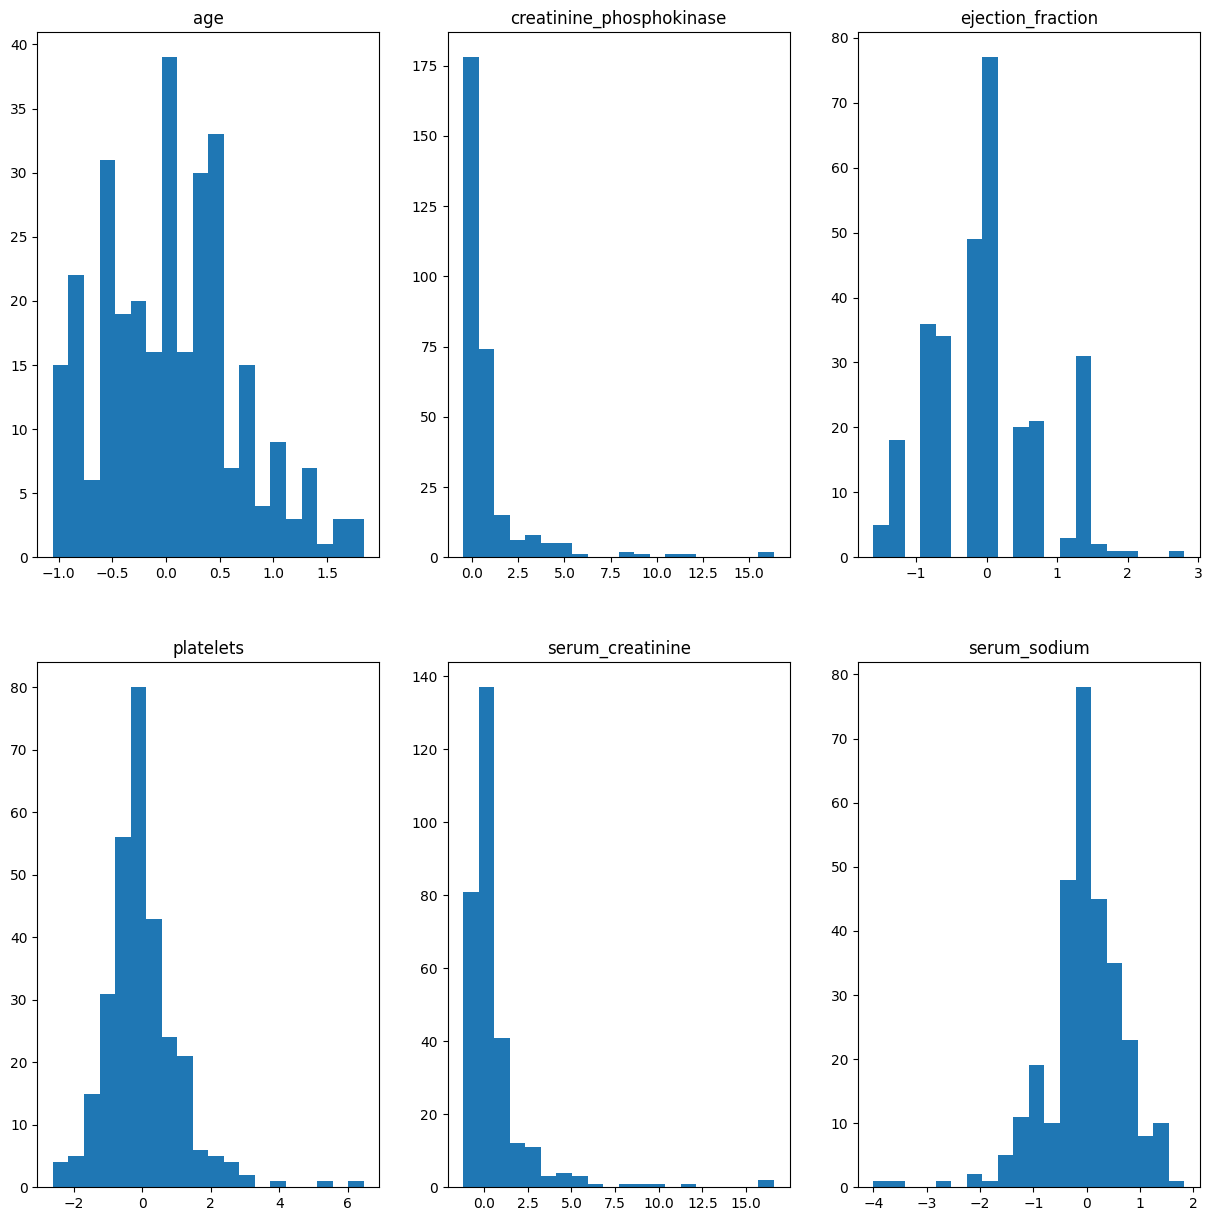

In [68]:
# 3.4.1 Аналогично трансформировал данные используя MaxAbsScaler и RobustScaler. Построил гистограммы. Определил к какому диапазону приводятся данные.

data_robust_scaled = preprocessing.RobustScaler().fit_transform(data)
fig, axs = plt.subplots(2,3)

fig.set_figheight(15)
fig.set_figwidth(15)

axs[0,0].hist(data_robust_scaled[:,0], bins = n_bins)
axs[0,0].set_title('age')

axs[0,1].hist(data_robust_scaled[:,1], bins = n_bins)
axs[0,1].set_title('creatinine_phosphokinase')

axs[0,2].hist(data_robust_scaled[:,2], bins = n_bins)
axs[0,2].set_title('ejection_fraction')

axs[1,0].hist(data_robust_scaled[:,3], bins = n_bins)
axs[1,0].set_title('platelets')

axs[1,1].hist(data_robust_scaled[:,4], bins = n_bins)
axs[1,1].set_title('serum_creatinine')

axs[1,2].hist(data_robust_scaled[:,5], bins = n_bins)
axs[1,2].set_title('serum_sodium')

plt.show()

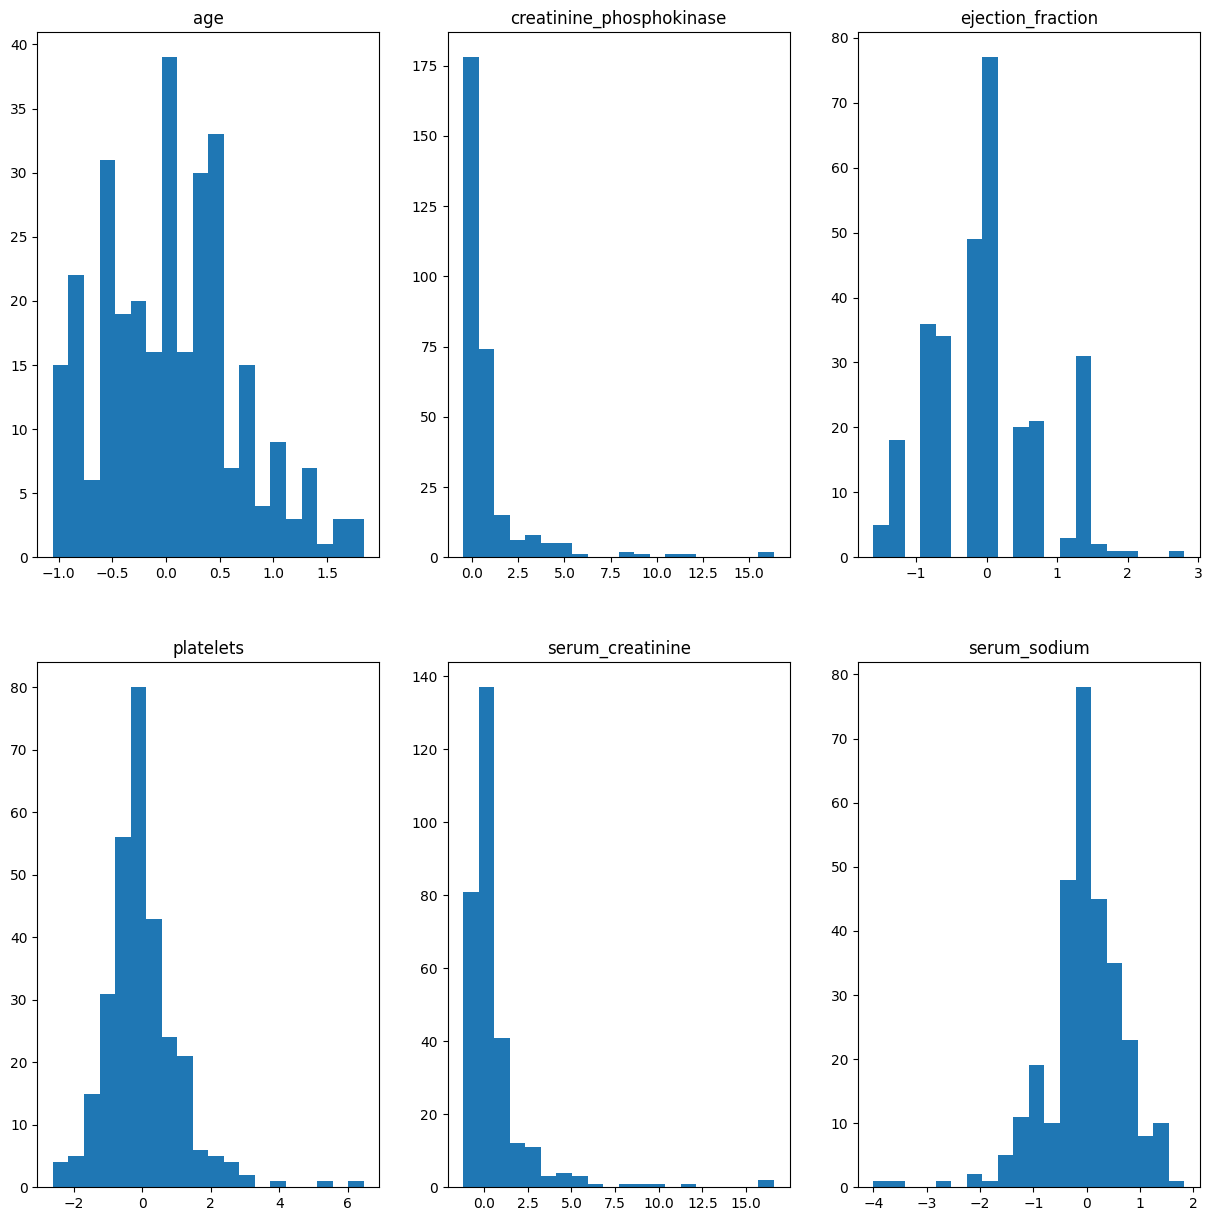

In [69]:
# 3.4.2

data_max_abs_scaled = preprocessing.RobustScaler().fit_transform(data)
fig, axs = plt.subplots(2,3)

fig.set_figheight(15)
fig.set_figwidth(15)

axs[0,0].hist(data_max_abs_scaled[:,0], bins = n_bins)
axs[0,0].set_title('age')

axs[0,1].hist(data_max_abs_scaled[:,1], bins = n_bins)
axs[0,1].set_title('creatinine_phosphokinase')

axs[0,2].hist(data_max_abs_scaled[:,2], bins = n_bins)
axs[0,2].set_title('ejection_fraction')

axs[1,0].hist(data_max_abs_scaled[:,3], bins = n_bins)
axs[1,0].set_title('platelets')

axs[1,1].hist(data_max_abs_scaled[:,4], bins = n_bins)
axs[1,1].set_title('serum_creatinine')

axs[1,2].hist(data_max_abs_scaled[:,5], bins = n_bins)
axs[1,2].set_title('serum_sodium')

plt.show()

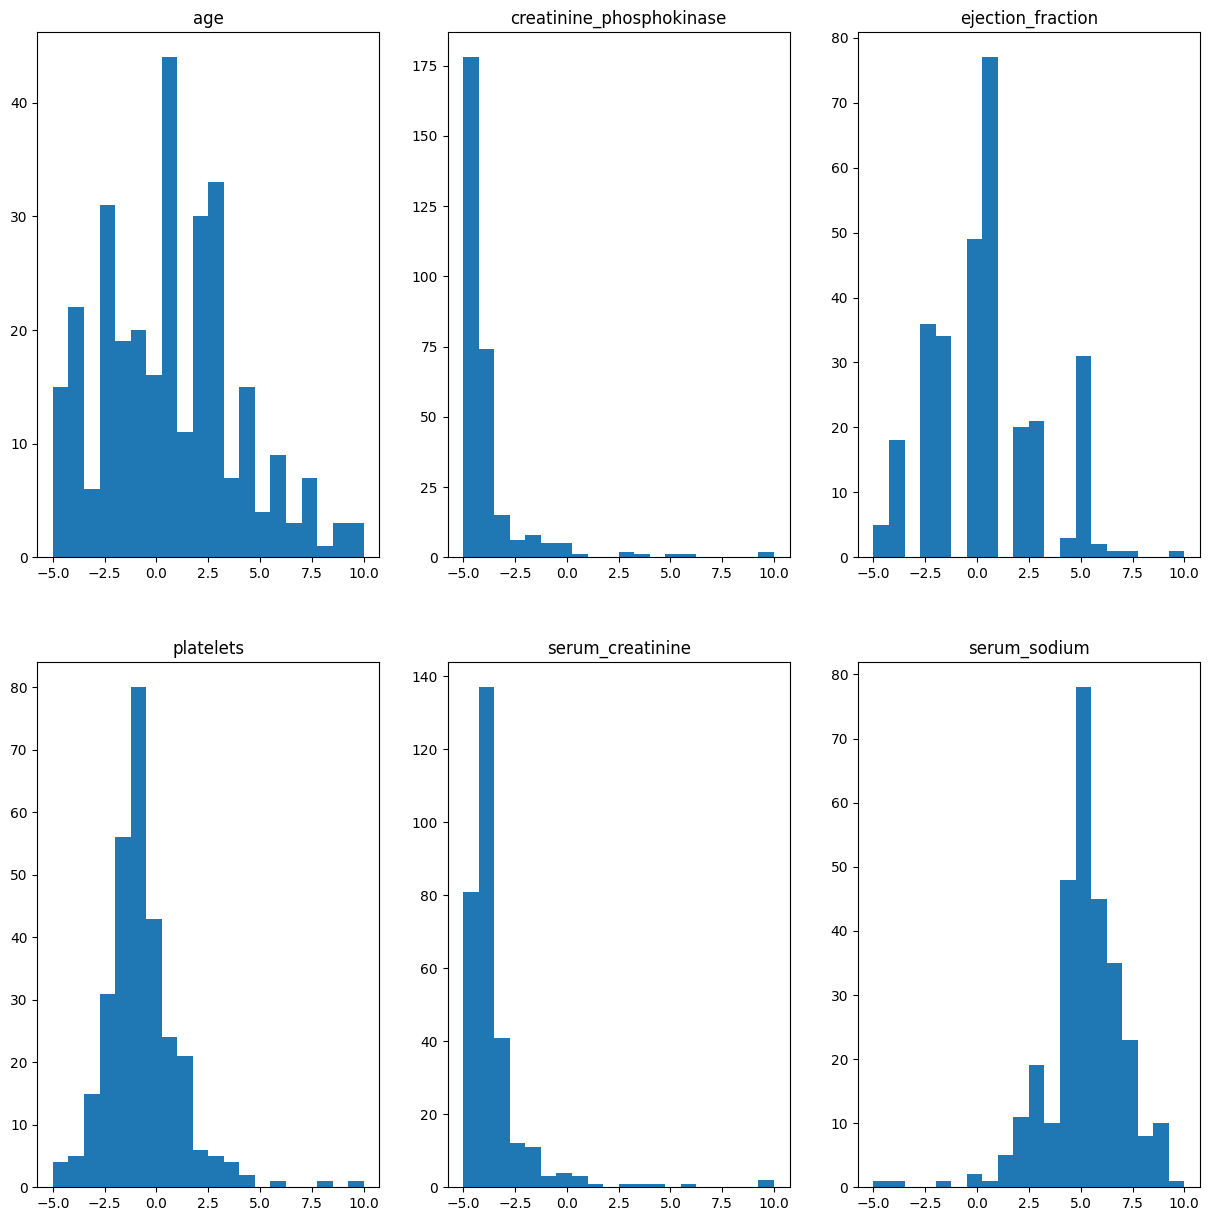

In [70]:
# 3.5 Написал функцию, которая приводит все данные к диапазону [-5 10]

def scalerfunc(data):
    min_max_scaler = preprocessing.MinMaxScaler(
        feature_range=(-5,10)).fit_transform(data)
    return min_max_scaler

data_scaled = scalerfunc(data)

n_bins = 20

fig, axs = plt.subplots(2,3)

fig.set_figheight(15)
fig.set_figwidth(15)

axs[0,0].hist(data_scaled[:,0], bins = n_bins)
axs[0,0].set_title('age')

axs[0,1].hist(data_scaled[:,1], bins = n_bins)
axs[0,1].set_title('creatinine_phosphokinase')

axs[0,2].hist(data_scaled[:,2], bins = n_bins)
axs[0,2].set_title('ejection_fraction')

axs[1,0].hist(data_scaled[:,3], bins = n_bins)
axs[1,0].set_title('platelets')

axs[1,1].hist(data_scaled[:,4], bins = n_bins)
axs[1,1].set_title('serum_creatinine')

axs[1,2].hist(data_scaled[:,5], bins = n_bins)
axs[1,2].set_title('serum_sodium')

plt.show()

Нелинейные преобразования

In [79]:
# 4.1 Привел данные к равномерному распределению используя QuantileTransformer

data_quantile_scaled = preprocessing.QuantileTransformer(n_quantiles= 100, random_state=0).fit_transform(data)



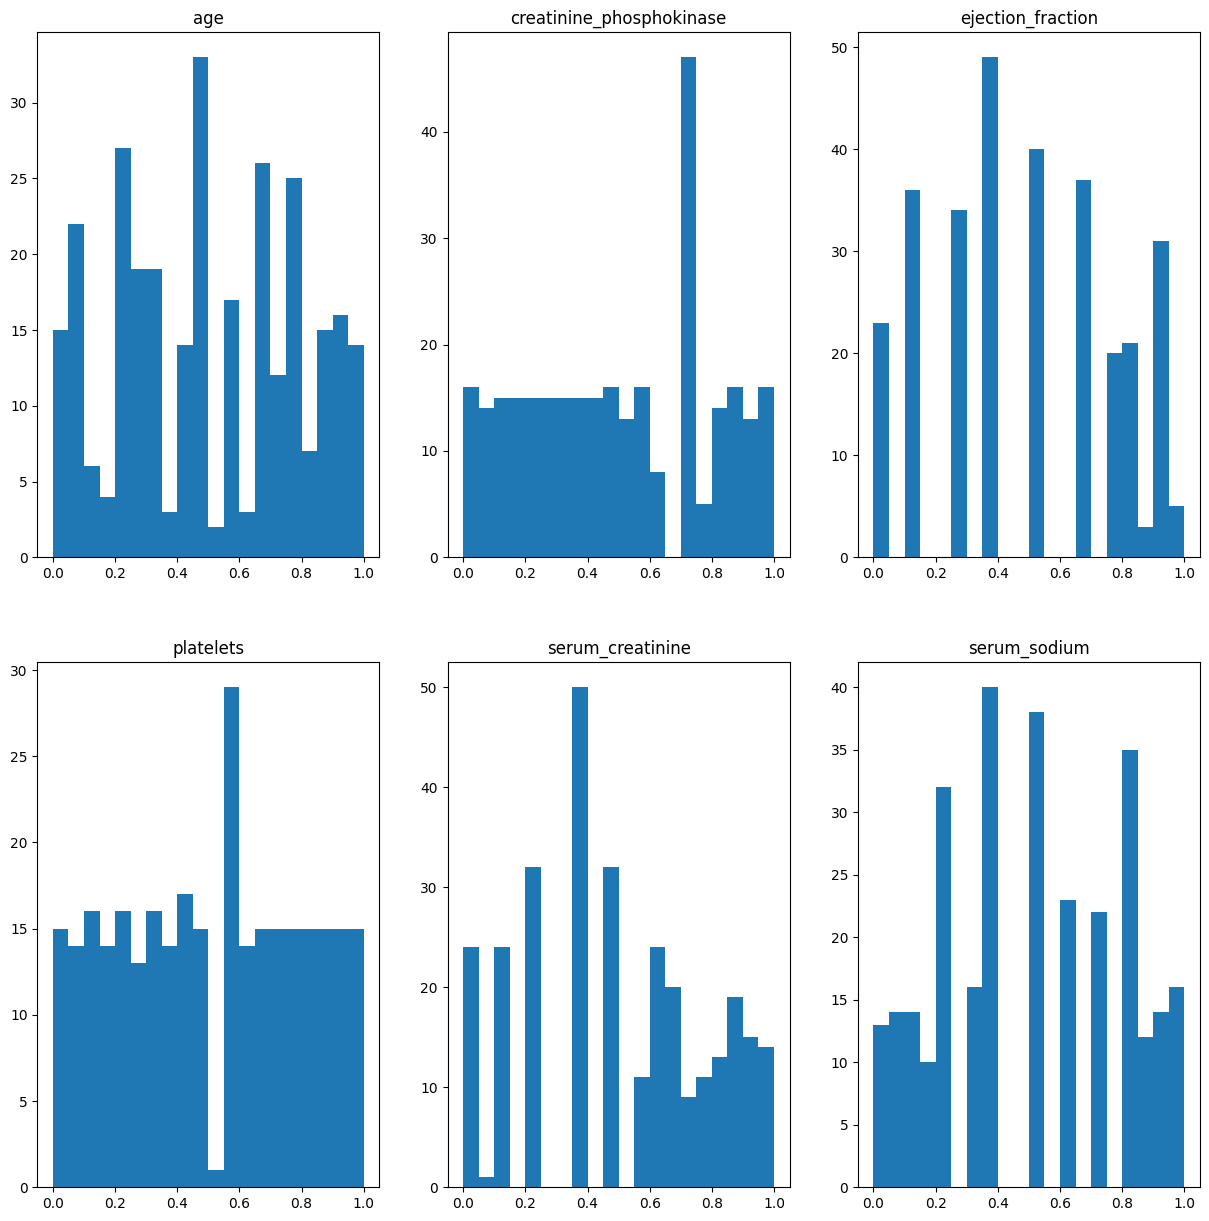

In [80]:
# 4.2 Построил гистограммы и сравнил с исходными данными

fig, axs = plt.subplots(2,3)

fig.set_figheight(15)
fig.set_figwidth(15)

axs[0,0].hist(data_quantile_scaled[:,0], bins = n_bins)
axs[0,0].set_title('age')

axs[0,1].hist(data_quantile_scaled[:,1], bins = n_bins)
axs[0,1].set_title('creatinine_phosphokinase')

axs[0,2].hist(data_quantile_scaled[:,2], bins = n_bins)
axs[0,2].set_title('ejection_fraction')

axs[1,0].hist(data_quantile_scaled[:,3], bins = n_bins)
axs[1,0].set_title('platelets')

axs[1,1].hist(data_quantile_scaled[:,4], bins = n_bins)
axs[1,1].set_title('serum_creatinine')

axs[1,2].hist(data_quantile_scaled[:,5], bins = n_bins)
axs[1,2].set_title('serum_sodium')

plt.show()



In [ ]:
# 4.3 n_quantiles определяет количество выборок, используемых для дискретизации функции кумулятивного распределения

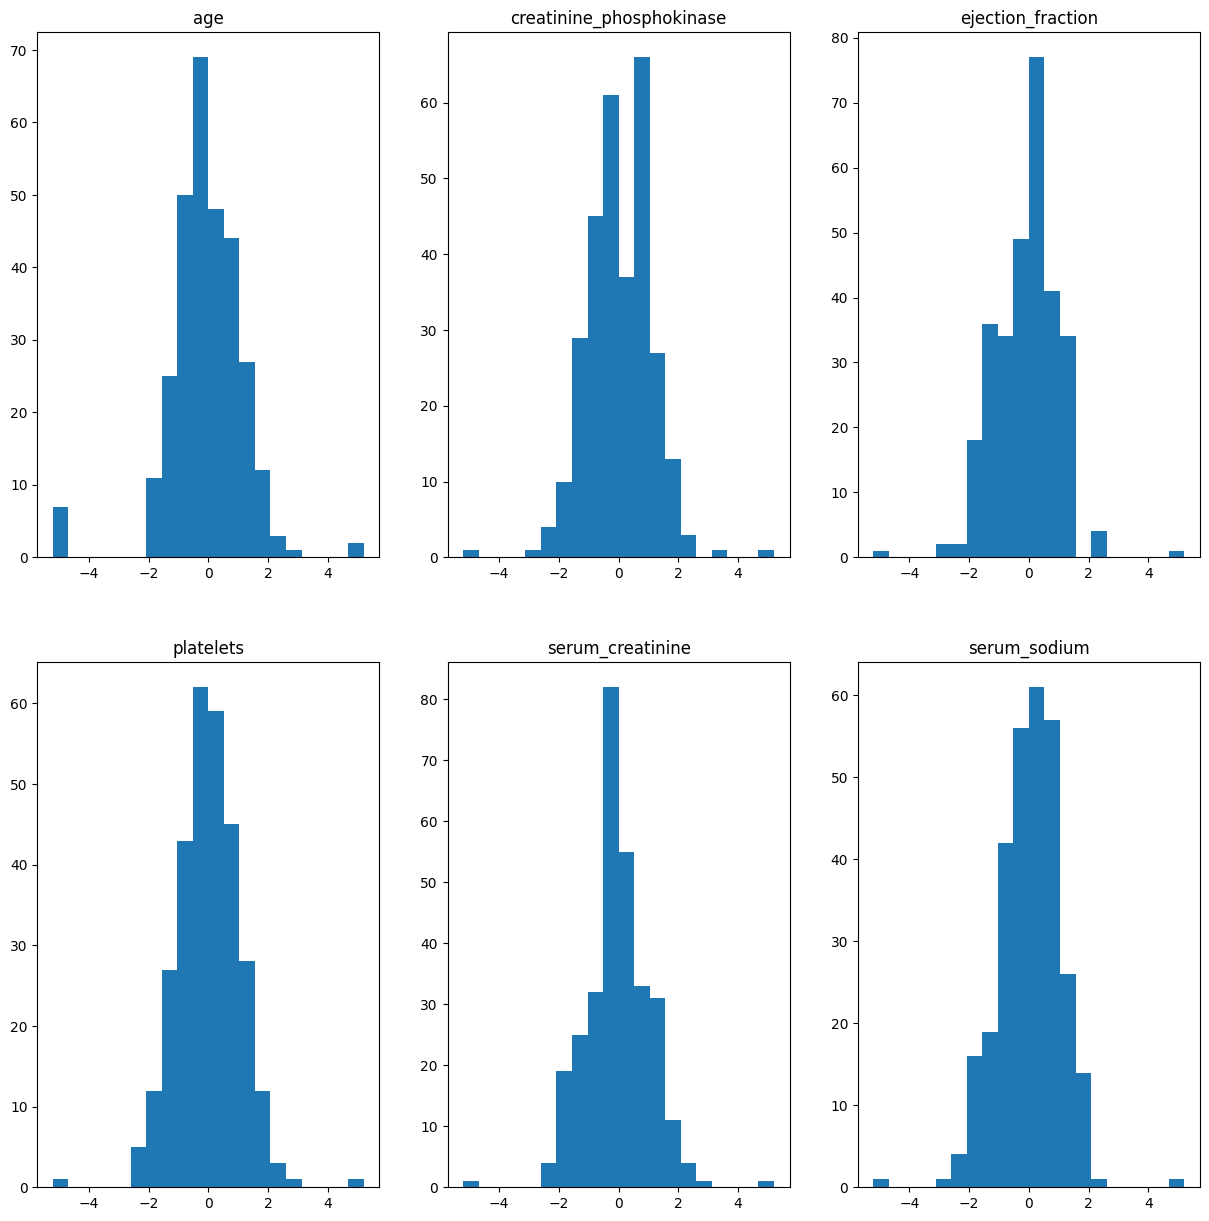

In [81]:
# 4.4 Привёл данные к нормальному распределению передав в QuantileTransformer параметр output_distribution='normal'

data_quantile_scaled = preprocessing.QuantileTransformer(n_quantiles= 100, random_state=0, output_distribution='normal').fit_transform(data)



In [ ]:
# 4.5 Построил гистограммы и сравнил с исходными данными

fig, axs = plt.subplots(2,3)

fig.set_figheight(15)
fig.set_figwidth(15)

axs[0,0].hist(data_quantile_scaled[:,0], bins = n_bins)
axs[0,0].set_title('age')

axs[0,1].hist(data_quantile_scaled[:,1], bins = n_bins)
axs[0,1].set_title('creatinine_phosphokinase')

axs[0,2].hist(data_quantile_scaled[:,2], bins = n_bins)
axs[0,2].set_title('ejection_fraction')

axs[1,0].hist(data_quantile_scaled[:,3], bins = n_bins)
axs[1,0].set_title('platelets')

axs[1,1].hist(data_quantile_scaled[:,4], bins = n_bins)
axs[1,1].set_title('serum_creatinine')

axs[1,2].hist(data_quantile_scaled[:,5], bins = n_bins)
axs[1,2].set_title('serum_sodium')

plt.show()

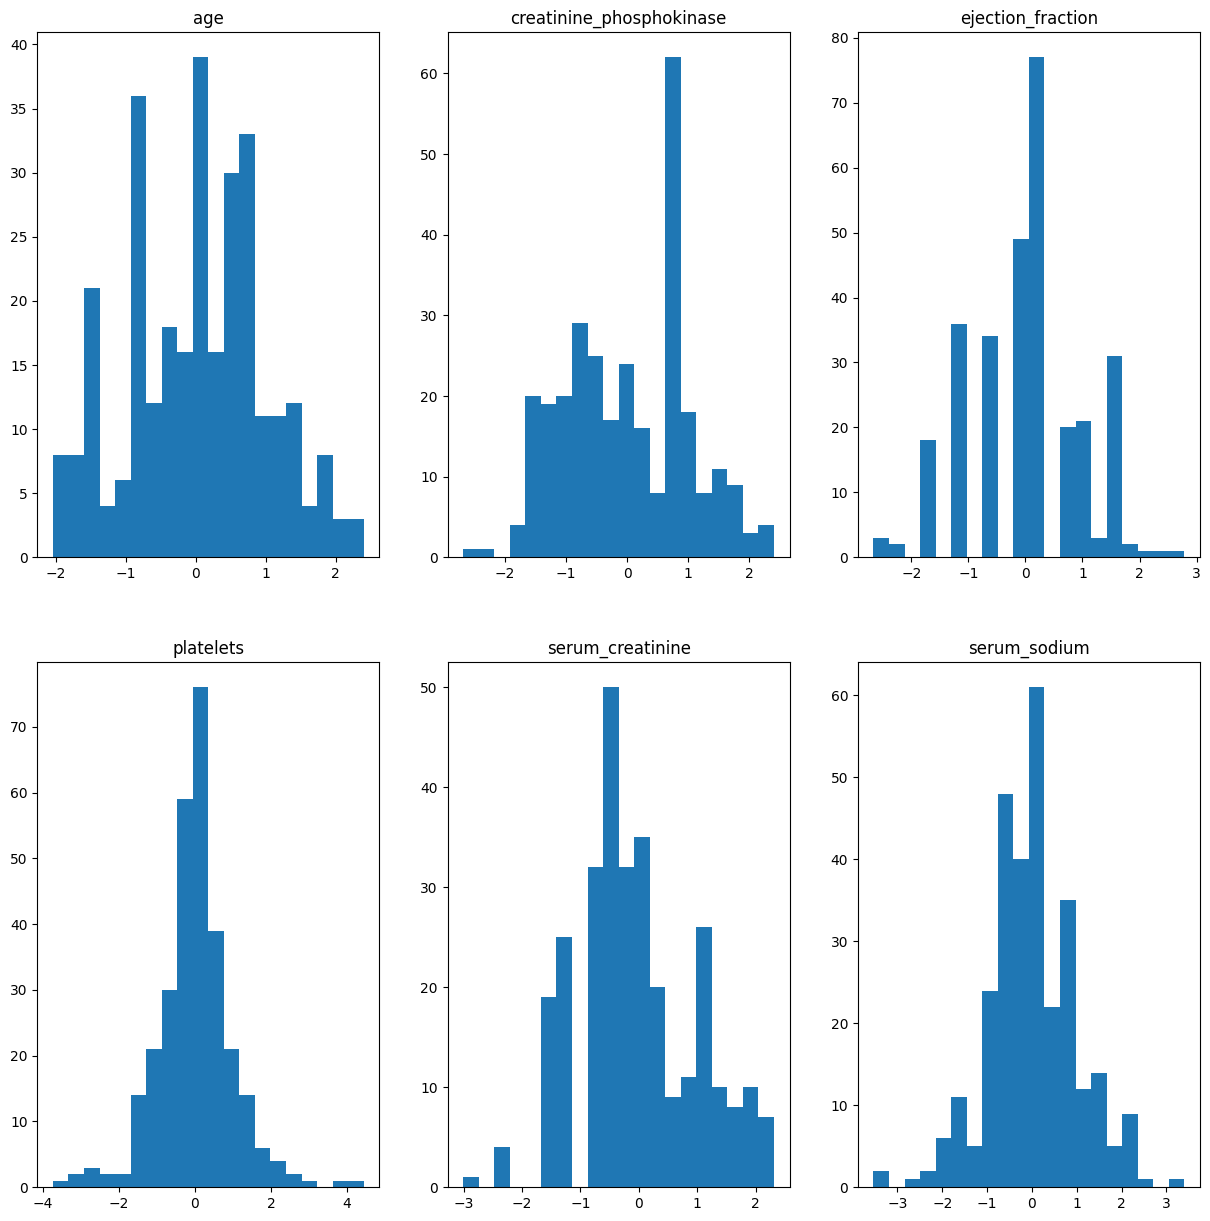

In [84]:
# 4.6 Привёл данные к нормальному распределению используя PowerTransformer

data_power_scaled = preprocessing.PowerTransformer().fit_transform(data)

fig, axs = plt.subplots(2,3)

fig.set_figheight(15)
fig.set_figwidth(15)

axs[0,0].hist(data_power_scaled[:,0], bins = n_bins)
axs[0,0].set_title('age')

axs[0,1].hist(data_power_scaled[:,1], bins = n_bins)
axs[0,1].set_title('creatinine_phosphokinase')

axs[0,2].hist(data_power_scaled[:,2], bins = n_bins)
axs[0,2].set_title('ejection_fraction')

axs[1,0].hist(data_power_scaled[:,3], bins = n_bins)
axs[1,0].set_title('platelets')

axs[1,1].hist(data_power_scaled[:,4], bins = n_bins)
axs[1,1].set_title('serum_creatinine')

axs[1,2].hist(data_power_scaled[:,5], bins = n_bins)
axs[1,2].set_title('serum_sodium')

plt.show()


Дискретизация признаков

In [85]:
# 5.1 Провел дискретизацию признаков, используя KBinsDiscretizer, на следующее количество диапазонов: age - 3 creatinine_phosphokinase - 4 ejection_fraction - 3 platelets - 10 serum_creatinine - 2 serum_sodium – 4

df = pd.read_csv('c:/Users/v-mar/Desktop/heart_failure_clinical_records_dataset.csv')

df = df.drop(columns = ['anaemia','diabetes','high_blood_pressure','sex','smoking','time','DEATH_EVENT'])

data = df.to_numpy(dtype='float')

est = preprocessing.KBinsDiscretizer(n_bins=[3, 4, 3, 10, 2, 4], encode='ordinal', strategy='uniform')
est.fit(data)

KBinsDiscretizer(encode='ordinal', n_bins=[3, 4, 3, 10, 2, 4],
                 strategy='uniform')

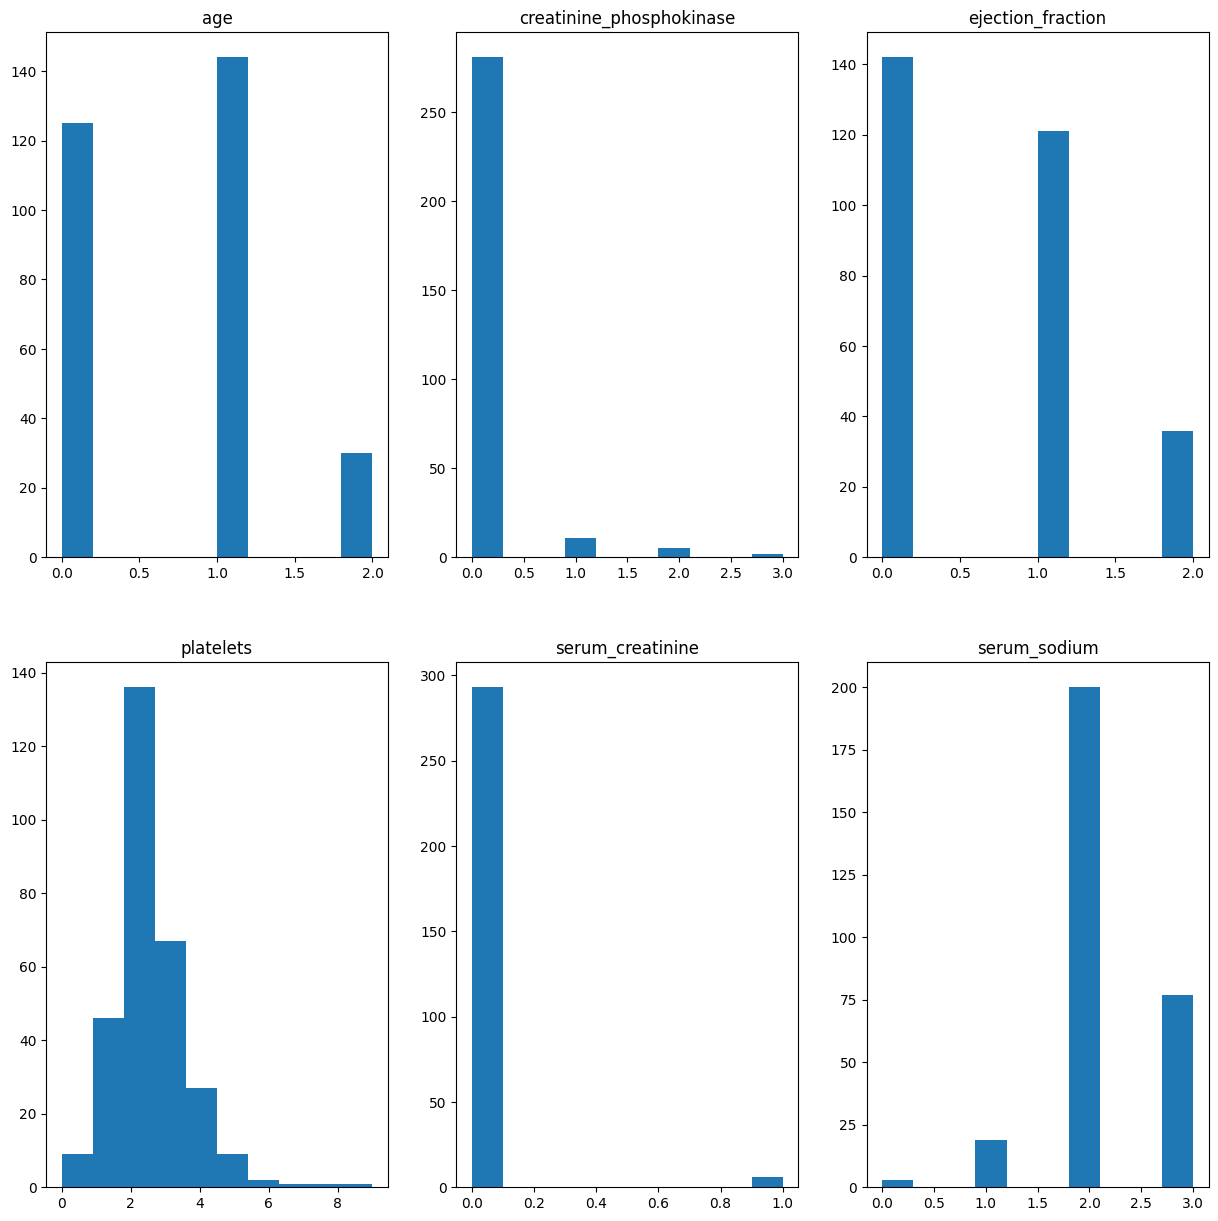

In [86]:
#5.2 Построил гистограммы

biner = preprocessing.KBinsDiscretizer(n_bins=[3, 4, 3, 10, 2, 4], encode='ordinal', strategy='uniform')
data_bined = biner.fit_transform(data)

fig, axs = plt.subplots(2,3)

fig.set_figheight(15)
fig.set_figwidth(15)

axs[0,0].hist(data_bined[:,0])
axs[0,0].set_title('age')

axs[0,1].hist(data_bined[:,1])
axs[0,1].set_title('creatinine_phosphokinase')

axs[0,2].hist(data_bined[:,2])
axs[0,2].set_title('ejection_fraction')

axs[1,0].hist(data_bined[:,3])
axs[1,0].set_title('platelets')

axs[1,1].hist(data_bined[:,4])
axs[1,1].set_title('serum_creatinine')

axs[1,2].hist(data_bined[:,5])
axs[1,2].set_title('serum_sodium')

plt.show()

In [87]:
# 5.3 Через параметр bin_edges_ вывел диапазоны каждого интервала для каждого признака

est.bin_edges_

array([array([40.        , 58.33333333, 76.66666667, 95.        ]),
       array([  23. , 1982.5, 3942. , 5901.5, 7861. ]),
       array([14., 36., 58., 80.]),
       array([ 25100., 107590., 190080., 272570., 355060., 437550., 520040.,
              602530., 685020., 767510., 850000.])                          ,
       array([0.5 , 4.95, 9.4 ]),
       array([113.  , 121.75, 130.5 , 139.25, 148.  ])], dtype=object)